The 2002 Oakland A's

The Oakland Athletics' 2002 season was the team's 35th in Oakland, California.It was also the 102nd season in franchise history. The Athletics finished first in the American League West with a record of 103-59.
The Athletics' 2002 campaign ranks among the most famous in franchise history. Following the 2001 season, Oakland saw the departure of three key players (the lost boys). Billy Beane, the team's general manager, responded with a series of under-the-radar free agent signings. The new-look Athletics, despite a comparative lack of star power, surprised the baseball world by besting the 2001 team's regular season record. 

The team is most famous, however, for winning 20 consecutive games between August 13 and September 4, 2002. 
The Athletics' season was the subject of Michael Lewis' 2003 book Moneyball: The Art of Winning an Unfair Game (as Lewis was given the opportunity to follow the team around throughout that season). This project is based off the book written by Michael Lewis (later turned into a movie).

In [3]:
#Reading the data file
df <- read.csv("/Users/raviswanath/Downloads/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Capstone and Data Viz Projects/Capstone Project/Batting.csv")

In [4]:
#sneak peak using head
print(head(df))

   playerID yearID stint teamID lgID  G G_batting AB R H X2B X3B HR RBI SB CS
1 aardsda01   2004     1    SFN   NL 11        11  0 0 0   0   0  0   0  0  0
2 aardsda01   2006     1    CHN   NL 45        43  2 0 0   0   0  0   0  0  0
3 aardsda01   2007     1    CHA   AL 25         2  0 0 0   0   0  0   0  0  0
4 aardsda01   2008     1    BOS   AL 47         5  1 0 0   0   0  0   0  0  0
5 aardsda01   2009     1    SEA   AL 73         3  0 0 0   0   0  0   0  0  0
6 aardsda01   2010     1    SEA   AL 53         4  0 0 0   0   0  0   0  0  0
  BB SO IBB HBP SH SF GIDP G_old
1  0  0   0   0  0  0    0    11
2  0  0   0   0  1  0    0    45
3  0  0   0   0  0  0    0     2
4  0  1   0   0  0  0    0     5
5  0  0   0   0  0  0    0    NA
6  0  0   0   0  0  0    0    NA


In [5]:
#Use str() to check the structure of the dataframe. 
#Pay close attention to how columns that start with a number get an 'X' in front of them!
print(str(df))

'data.frame':	97889 obs. of  24 variables:
 $ playerID : Factor w/ 18107 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

In [6]:
#Adding a few more measures into the set.
# 1. Batting Average
df$BA <- df$H / df$AB

#2. On Base %
df$OBP <- (df$H + df$BB + df$HBP ) / (df$AB + df$BB + df$HBP + df$SF)

#3. Slugging %
# We need to know 1B for calculating this.
 #3.a 1B
df$X1B <- df$H - (df$X2B + df$X3B + df$HR)

#Now we can calculate slugging %
df$SLG <- (df$X1B + 2*df$X2B + 3*df$X3B + df$HR) / (df$AB)

Now, we would be merging the batting data with salary data.

We know we don't just want the best players, we want the most undervalued players; meaning we will also need to know current salary information! 

In [7]:
#We have salary information in the csv file 'Salaries.csv'.
salary <- read.csv("/Users/raviswanath/Downloads/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Capstone and Data Viz Projects/Capstone Project/Salaries.csv")

In [8]:
#Using summary() to get a summary of the batting data frame 
print(summary(df))

      playerID         yearID         stint           teamID        lgID      
 mcguide01:   31   Min.   :1871   Min.   :1.000   CHN    : 4720   AA  : 1890  
 henderi01:   29   1st Qu.:1931   1st Qu.:1.000   PHI    : 4621   AL  :44369  
 newsobo01:   29   Median :1970   Median :1.000   PIT    : 4575   FL  :  470  
 johnto01 :   28   Mean   :1962   Mean   :1.077   SLN    : 4535   NL  :49944  
 kaatji01 :   28   3rd Qu.:1995   3rd Qu.:1.000   CIN    : 4393   PL  :  147  
 ansonca01:   27   Max.   :2013   Max.   :5.000   CLE    : 4318   UA  :  332  
 (Other)  :97717                                  (Other):70727   NA's:  737  
       G            G_batting            AB              R         
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 13.00   1st Qu.:  7.00   1st Qu.:  9.0   1st Qu.:  0.00  
 Median : 35.00   Median : 32.00   Median : 61.0   Median :  5.00  
 Mean   : 51.65   Mean   : 49.13   Mean   :154.1   Mean   : 20.47  
 3rd Qu.: 81.00   3rd Qu.: 8

Notice the minimum year in the yearID column. 
Our batting data goes back to 1871! Our salary data starts at 1985, meaning we need to remove the batting data that occured before 1985.

In [9]:
batting <- subset(df, yearID >= 1985)

#Check with summary() again to see if min of YearID is 1985.
print(summary(batting))

      playerID         yearID         stint          teamID      lgID      
 moyerja01:   27   Min.   :1985   Min.   :1.00   SDN    : 1313   AA:    0  
 mulhote01:   26   1st Qu.:1993   1st Qu.:1.00   CLE    : 1306   AL:17226  
 weathda01:   26   Median :2000   Median :1.00   PIT    : 1299   FL:    0  
 maddugr01:   25   Mean   :2000   Mean   :1.08   NYN    : 1297   NL:18426  
 sierrru01:   25   3rd Qu.:2007   3rd Qu.:1.00   BOS    : 1279   PL:    0  
 thomeji01:   25   Max.   :2013   Max.   :4.00   CIN    : 1279   UA:    0  
 (Other)  :35498                                 (Other):27879             
       G           G_batting            AB              R         
 Min.   :  1.0   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 14.0   1st Qu.:  4.00   1st Qu.:  3.0   1st Qu.:  0.00  
 Median : 34.0   Median : 27.00   Median : 47.0   Median :  4.00  
 Mean   : 51.7   Mean   : 46.28   Mean   :144.7   Mean   : 19.44  
 3rd Qu.: 77.0   3rd Qu.: 77.00   3rd Qu.:241.0   3rd Qu.

---

Now it is time to merge the batting data with the salary data. 
Since we have players playing multiple years, we'll have repetitions of playerIDs for multiple years;
meaning we want to merge on both players and years.

In [10]:
#Using the merge() function to merge the batting and sal data frames by c('playerID','yearID'). 
combo <- merge(batting, salary, by = c('playerID', 'yearID') )
print(summary(combo))

      playerID         yearID         stint          teamID.x     lgID.x    
 moyerja01:   27   Min.   :1985   Min.   :1.000   LAN    :  940   AA:    0  
 thomeji01:   25   1st Qu.:1993   1st Qu.:1.000   PHI    :  937   AL:12292  
 weathda01:   25   Median :1999   Median :1.000   BOS    :  935   FL:    0  
 vizquom01:   24   Mean   :1999   Mean   :1.098   NYA    :  928   NL:13105  
 gaettga01:   23   3rd Qu.:2006   3rd Qu.:1.000   CLE    :  920   PL:    0  
 griffke02:   23   Max.   :2013   Max.   :4.000   SDN    :  914   UA:    0  
 (Other)  :25250                                  (Other):19823             
       G            G_batting            AB              R         
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 26.00   1st Qu.:  8.00   1st Qu.:  5.0   1st Qu.:  0.00  
 Median : 50.00   Median : 42.00   Median : 85.0   Median :  9.00  
 Mean   : 64.06   Mean   : 57.58   Mean   :182.4   Mean   : 24.71  
 3rd Qu.:101.00   3rd Qu.:101.00   3rd Qu.:3

---

Analyzing the Lost Players


As previously mentioned, the Oakland A's lost 3 key players during the off-season. We want to get their stats to see what we have to replace. The players lost were: first baseman 2000 AL MVP Jason Giambi (giambja01) to the New York Yankees, outfielder Johnny Damon (damonjo01) to the Boston Red Sox and infielder Rainer Gustavo "Ray" Olmedo ('saenzol01').

In [11]:
#Using the subset() function to get a dataframe called lost_players from the combo dataframe consisting of those 3 players.
#Since the players left in 2001, using yearID also to filter them out.
lost_players <- subset(combo, playerID %in% c('giambja01', 'damonjo01', 'saenzol01') & yearID %in% c( 2001 ))

In [12]:
#more filtering
relevant.cols <- c("playerID", "H", "X2B", "X3B", "HR", "OBP", "SLG", "BA", "AB", "salary")
print(lost_players[relevant.cols])

       playerID   H X2B X3B HR       OBP       SLG        BA  AB  salary
5141  damonjo01 165  34   4  9 0.3235294 0.3214286 0.2562112 644 7100000
7878  giambja01 178  47   2 38 0.4769001 0.4403846 0.3423077 520 4103333
20114 saenzol01  67  21   1  9 0.2911765 0.2950820 0.2196721 305  290000


---

Replacement Players

Now we have all the information we need! The final task - Find Replacement Players for the key three players we lost! 
However, we do have three constraints:
  
 1. The total combined salary of the three players can not exceed 15 million dollars.
 2. Their combined number of At Bats (AB) needs to be equal to or greater than the lost players.
 3. Their mean OBP had to equal to or greater than the mean OBP of the lost players

In [13]:
#Using the combo dataframe we previously created , we can do this easily

#First, lets filter out the other years from combo using subset
relevant.players <- subset(combo, yearID == 2001)

In [18]:
#salary limit
print(sum(lost_players$salary))

[1] 11493333


In [19]:
#AB's
print(sum(lost_players$AB))

[1] 1469


In [20]:
#Mean OBPs
print(mean(lost_players$OBP))

[1] 0.3638687


Warning message:
“Ignoring unknown parameters: dotsize”Warning message:
“Removed 168 rows containing missing values (geom_point).”

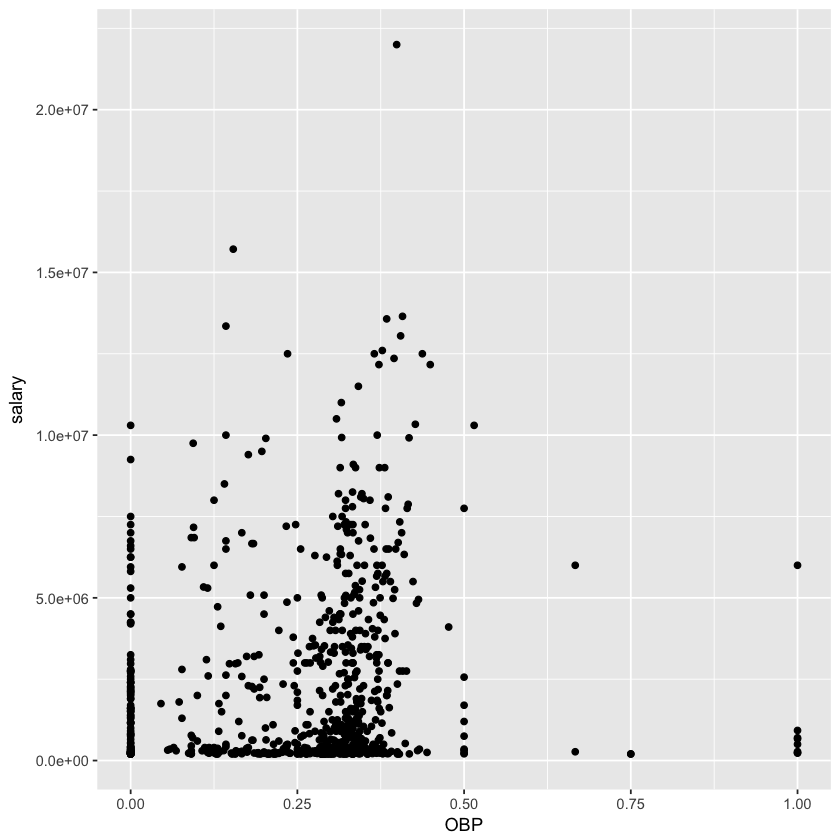

In [23]:
#let's be creative and do this by plotting
library(ggplot2)
library(plotly)

p1 <- ggplot(relevant.players, aes(x= OBP, y = salary)) + geom_point(dotsize = 0.4)
print(p1)

The plot shows that there are lots of players with 0 OBP and a few with 1 OBP. Both are extreme and we don't need that. We'll take values around 0.5 and cap the salary of each player at say, a million dollars.

---

In [24]:
#Finally, we can choose any set of three players from the list generated below.
choices <- subset(relevant.players, OBP >= 0.4 & OBP <= 0.6 & salary <= 12000000 & AB >= 450)
choices <- choices[relevant.cols]
print(head(arrange(choices, desc(OBP))), 10)

   playerID   H X2B X3B HR       OBP       SLG        BA  AB   salary
1 bondsba01 156  32   2 73 0.5150602 0.4033613 0.3277311 476 10300000
2 giambja01 178  47   2 38 0.4769001 0.4403846 0.3423077 520  4103333
3 heltoto01 197  54   2 49 0.4316547 0.4344123 0.3356048 587  4950000
4 berkmla01 191  55   5 34 0.4302326 0.4436742 0.3310225 577   305000
5 gonzalu01 198  36   7 57 0.4285714 0.4072250 0.3251232 609  4833333
6 jonesch06 189  33   5 38 0.4268833 0.4055944 0.3304196 572 10333333


---